In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.DataLoader import LoadFaceDB
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayConvergenceClassif
#from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.CHAMP_Layer import ConvMP
from CHAMP.DataTools import GenerateGabor, Rebuilt
import matplotlib.pyplot as plt
from CHAMP.LowLevel import conv
from CHAMP.Classif_Layer import Classif_Layer
import os
home = os.getenv('HOME')

# On Face DataBase

## Load the DataBase

In [2]:
path = "../../../Science/These/Rapport d'avancement/database/Face_DataBase/"
#path = home + "/science/VB_These/Rapport d'avancement/database/Face_DataBase/"
training_set = LoadFaceDB(path, nb_batch=1,Decorrelated=True,Normalized=False)

In [3]:
print(training_set[1].size())

torch.Size([1, 400])


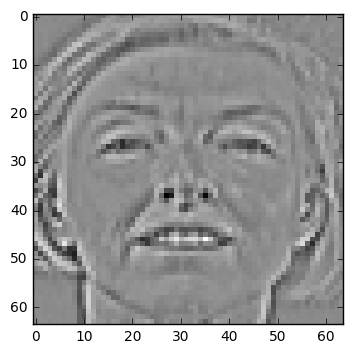

In [4]:
plot = plt.imshow(training_set[0][0,0,0,:,:].numpy(),cmap='gray')

## Generate Filters

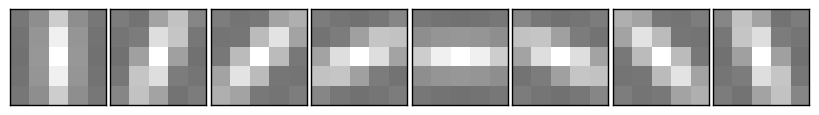

In [5]:
DicoGabor = GenerateGabor(nb_dico=8,dico_size=(5,5),sigma=1,lambd=5,gamma=0.5,psi=0)
DisplayDico(DicoGabor)

## Coding

In [6]:
code = ConvMP(image_input=training_set[0][0,:,:,:,:], dictionary=DicoGabor, l0_sparseness=100,
                modulation=None, verbose=0, train=True, doSym='pos', mask=None,\
                MaskMod='Residual')

In [7]:
reconstructed_image = Rebuilt(training_set[0][0,:,:,:,:],code,DicoGabor)

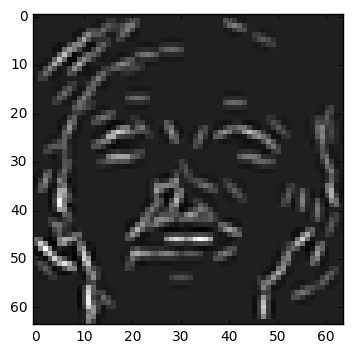

In [8]:
plt.imshow(reconstructed_image[0,0,:,:].numpy(),cmap='gray')

In [9]:
residual=training_set[0][0,:,:,:,:]-reconstructed_image

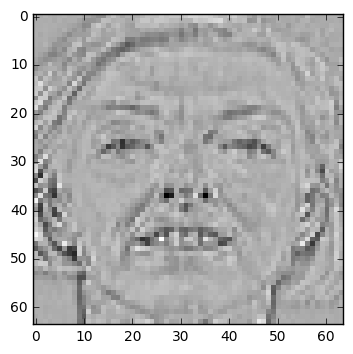

In [10]:
plt.imshow(residual[0,0,:,:].numpy(),cmap='gray')

## Classifying Raw Data

In [11]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier_Raw = Classif_Layer(nb_dico=1,size_image=(64,64),nb_categories=40, verbose=0)
a = Classifier_Raw.train_classif(training_set,nb_epoch=50000,data_test_loader=training_set,lr=0.004)

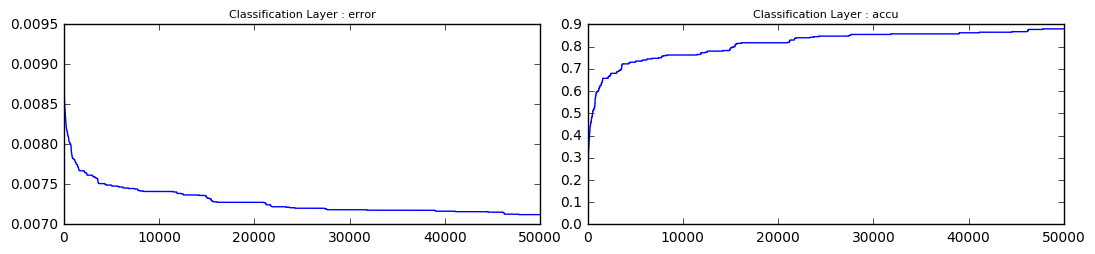

In [12]:
DisplayConvergenceClassif(Classifier_Raw, to_display=['error','accu'])

## Classifying Output of One CHAMP Layer

In [13]:
output_Layer1 = (code.to_dense().unsqueeze(0),training_set[1])

In [14]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier_CHAMP = Classif_Layer(nb_dico=8,size_image=(60,60), nb_categories=40, verbose=0)
b = Classifier_CHAMP.train_classif(output_Layer1,nb_epoch=500,data_test_loader=output_Layer1,lr=0.001)

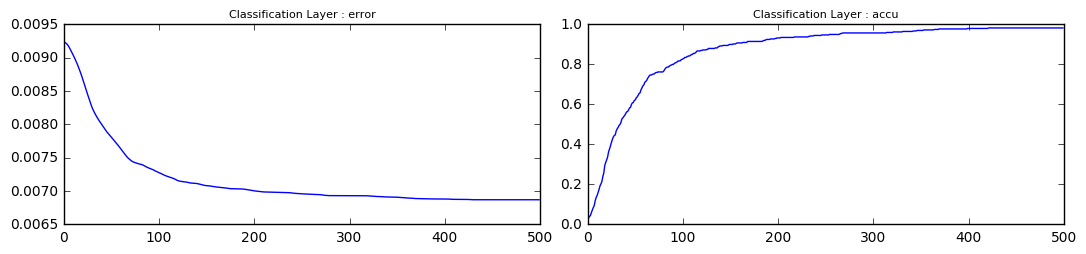

In [15]:
DisplayConvergenceClassif(Classifier_CHAMP, to_display=['error','accu'])

## Classyfing output of Convolutional Layer

In [16]:
Output = conv(training_set[0][0,:,:,:,:], DicoGabor)
output_ConvLayer1 = (Output.unsqueeze(0),training_set[1])

In [17]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier_Conv = Classif_Layer(nb_dico=8,size_image=(60,60), nb_categories=40, verbose=0)
Classifier_Conv = Classifier_Conv.train_classif(output_ConvLayer1,nb_epoch=20000,data_test_loader=output_ConvLayer1,lr=0.0001)

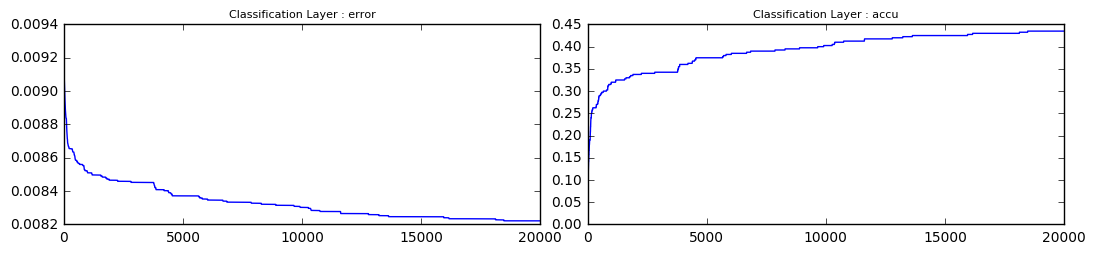

In [18]:
DisplayConvergenceClassif(Classifier_Conv, to_display=['error','accu'])